# Introduction to probability distributions and Monte Carlo simulations

This notebook introduces you to the basics of probability distributions and their application in Monte Carlo simulations. In the last notebook we learned how to think in terms of probabilities and worked with a basic example. Very often we do not have access to a dataset of all possible outcomes (sample space) that we can query to see how probable different outcomes are (or any set of outcomes, which we called an **event**). This can be because there are far too many outcomes to list them all or because such a detailed data is simply not available. Even if we had this data, querying it every time we wanted to find the probability of some event is not the a very efficient way to get the answer. Instead, we can find the probability associated with each outcome in the sample space once and save it for future reference. This is basically what a probability distribution is: a sort of lookup table that we refer to when we need to find the probability of some event.

In [1]:
import numpy as np
import pandas as pd
import itertools
import scipy
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_palette('muted')
sns.set_style('ticks')

For example, we saw that if we roll two dice and get the sum, the sample space looks like this:

<img src="https://library.startlearninglabs.uw.edu/DATASCI410/img/Dice.jpg" style="height: 300px;" alt="Rolling dice image">

And so we can see for example that $P(\text{sum} = 6) = 5/36$ (since all outcomes are equally likely, we can just count how many squares have a 5 and divide by the total). But if we need to look up these probabilities often, it may be easier to just find the probability distribution and refer to it when needed.

In [3]:
two_dice = pd.DataFrame(itertools.product(range(1, 7), range(1, 7)), columns = ['one', 'two'])
two_dice['roll_sum'] = two_dice.apply(sum, axis = 1)

prob_dist = two_dice['roll_sum'].value_counts(normalize = True, sort = False)
prob_dist

2     0.027778
3     0.055556
4     0.083333
5     0.111111
6     0.138889
7     0.166667
8     0.138889
9     0.111111
10    0.083333
11    0.055556
12    0.027778
Name: roll_sum, dtype: float64

We can display the above distribution using a barplot. Since the sample space is limited to integers between 2 and 12, this is called a **discrete distribution**.

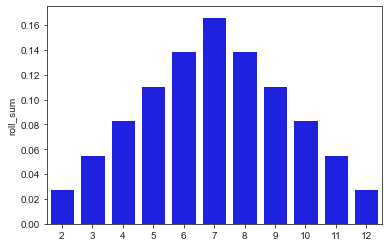

In [4]:
sns.barplot(x = prob_dist.index, y = prob_dist, color = 'blue');

Can we do even better than that? Maybe. We could try for example to encode the above distribution as a formula such as $P(k) = P(X = k) = -a|x - 7| + b$ with $x = \{2, 3, \cdots, 12\}$ and $a, b$ chosen so that $\sum_x P(x) = 1$. If we have such a formula, then to get $P(X = k)$ we just plug it into the function. No more querying the data. No more lookup tables.

Of course getting such a function for any distribution is not always easy to do, but for certain common scenarios such functions have been found and learning about them and how to use them is the topic of today.

## Discrete distributions

Discrete distributions are used to model the probability of events with discrete outcomes or states. Discrete distributions have a countable number of possible outcomes. The distribution measures the probability of each of these outcomes. We therefore call the distribution function the **probability mass function**.

The basic properties of discrete distributions are:

- The sum of the probabilities of all possible events must equal 1.
- The probability of an event is equal to the value of distribution at that point.
- All probabilities are strictly in the range 0-1.

### Discrete uniform distribution

This is the easiest of the distributions. Let's say you flip a fair coin. Then heads and tail have the same probability of happening, 50% each. In other words, the outcome of the coin flip follows a **uniform** distribution (equal probability), and because the options are limited to heads and tails it is **discrete**.

Another example is let's say you wake up in the morning and wonder what shirt to wear. If you have $20$ shirts and each is as likely to be selected as any other, then your choice of a shirt to wear follows a discrete uniform distribution and every short has a probability of $1/20$ to be selected.

### Bernoulli distribution

The coin toss example earlier can be generalized to **biased coins** using the Bernoulli distribution, which model trials with binary outcomes. For example, the flip of a coin can only result in two possible end states: heads or tails.

For an event with a binary outcome, $X \in \{0,1\}$ with probability $p$ of state 1, we can write the probability mass function for the Bernoulli distribution as:

$$P(X | p) = \bigg\{ 
\begin{matrix}
p &\text{if } X = 1\\
1 - p &\text{if } X = 0
\end{matrix}$$

Or as a one-liner: $P(X | p) = p^X + (1 - p)^{(1 - X)}$.

The Bernoulli distribution has mean $p$ and variance $p(1-p)$.

Let's explore the Bernoulli distribution. The code in the cell below computes the outcome of $1000$ Bernoulli trials with $p = 0.75$. The **theoretical and empirical** mean and variance for these trials are displayed. Execute this code and examine the results. How close are the empirical mean and variance to the theoretical mean and variance?

In [5]:
p = 0.75
sample_size = 10**6

bern_samples = np.random.binomial(1, p, sample_size) # draw samples from binomial distribution
bern_samples.shape

(1000000,)

In [6]:
print('theoretical mean p = %.6f, sample mean = %.6f' % (p, bern_samples.mean()))

theoretical mean p = 0.750000, sample mean = 0.750002


In [7]:
print('theoretical variance = %.3f   Sample variance = %.3f' % (p * (1 - p), bern_samples.var()))

theoretical variance = 0.188   Sample variance = 0.187


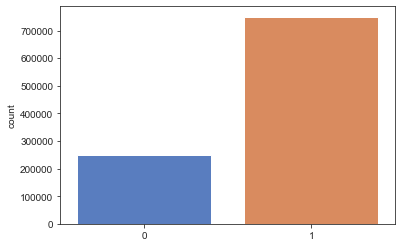

In [8]:
sns.countplot(bern_samples);

### Binomial distribution

If we perform $n$ independent Bernoulli trials with outcomes success and failure (or heads or tails, or 0 or 1), where $p$ is the probability of success, then the number of successes follows a binomial distribution.

$$P(X | n, p) = \binom{n}{X} p^X(1 - p)^{(n - X)}$$

Notice that the product includes the term $\binom{N}{X}$ since we must account for all possible combinations of outcomes from the trials. The theoretical mean and variance of the binomial distribution are $np$ and $np(1-p)$ respectively.

Let's try computing several binomial distributions, with probability of success $p = 0.75$, and letting $n$ take on the values $\{5, 25, 75 \}$. The code in the cell below computes $1000$ realizations of the binomial distribution for each value of $n$. The theoretical and sample means and variances are computed and printed for each case.

In [9]:
trials = np.array([5, 25, 75])
binom_samples = [np.random.binomial(n, p, sample_size) for n in trials]

binom_sample_means = [samples.mean() for samples in binom_samples]
binom_means = trials * p
pd.DataFrame({
    'theoretical mean': binom_means,
    'sample mean': binom_sample_means,
})

,theoretical mean,sample mean
0,3.75,3.750454
1,18.75,18.747678
2,56.25,56.246752


In [10]:
binom_sample_vars = [samples.var() for samples in binom_samples]
binom_vars = trials * p * (1 - p)
pd.DataFrame({
    'theoretical variance': binom_vars,
    'sample variance': binom_sample_vars
})

,theoretical variance,sample variance
0,0.9375,0.936639
1,4.6875,4.683168
2,14.0625,14.089409


In the cell below, create and execute the code to plot the simple histograms of the three binomial distributions in the `binom_samples` list. Do these distributions appear as you expect? 

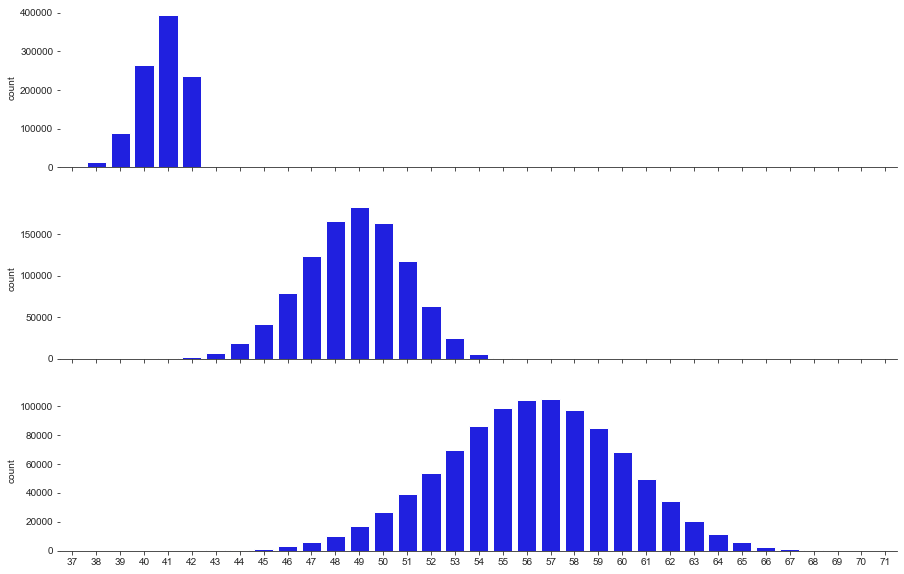

In [11]:
f, axes = plt.subplots(3, 1, sharex = True, figsize = (15, 10))
sns.despine(left = True)

sns.countplot(binom_samples[0], ax = axes[0], color = 'blue')
sns.countplot(binom_samples[1], ax = axes[1], color = 'blue')
sns.countplot(binom_samples[2], ax = axes[2], color = 'blue');

Notice that while the outcome of each Bernoulli trial is a discrete binary result, the result of multiple trials can take many discrete values. In fact, as $n$ becomes large the binomial distribution starts to look like a continuous distribution. In fact, the binomial distribution converges to the continuous **normal distribution** as $n \rightarrow \infty$. We will learn more about the normal distribution soon.

One last note: the binomial distribution works only with sequences **binary outcomes**, but there is a simple extension to the binomial distribution called the **multi-nomial distribution** which models sequences of events with a limited number of predefined outcomes (heads and tails, various colors, etc.).

### Poisson distribution

A common problem is modeling of the count of events occurring within some period of time. The Poisson distribution models the occurrence of events in a fixed interval of time. We say that the Poisson distribution models the probability of x **arrivals** within the time period.

In mathematical terms we write the Poisson distribution as:

$$ 
P(X\ |\ \lambda) = \frac{\lambda^X}{X!} \exp^{-\lambda}
$$

The theoretical mean and variance of the Poisson distribution are both equal to $\lambda$.

The code in the cell below computes $1000$ realizations of Poisson distributions with average arrival rates, $\lambda = \{ 1, 5, 25, 100\}$. The sample mean and variance for each distribution is then computed and printed along with the theoretical values.

In [12]:
lambdas = [1, 5, 25, 100]
poisson_samples = [np.random.poisson(l, size = 100) for l in lambdas]

poisson_sample_means = [samples.mean() for samples in poisson_samples]
poisson_sample_vars = [samples.var() for samples in poisson_samples]

pd.DataFrame({
    'theoretical mean / variance': lambdas,
    'sample mean': poisson_sample_means,
    'sample variance': poisson_sample_vars,
})

,theoretical mean / variance,sample mean,sample variance
0,1,0.90,0.9100
1,5,5.03,4.4891
2,25,25.66,27.4844
3,100,98.21,95.7259


## Continuous Distributions

Continuous distributions are used to model variables with continuous valued random variables. Physical measurements, such as weight, length and temperature are examples of variables with continuous variables. 

Continuous distributions have an infinite number of possible outcomes. The distribution measures the probability for some range of values. We therefore call the distribution function the **probability density function**. This is in contrast to the **probability mass function** for discrete distributions. 

The probability of a value being in the range $(a, b)$ can be written as the integral of the probability density function over that range.

$$P(a < X < b) = \int_{a}^{b} P(X) dX$$

Notice that for a single exact value $a = b$, the probability is $0$.

Properties of continuous distributions are:

- The area under the distribution curve must be equal to 1, integrated over the range of possible values.
- The probability of a range of values of an event equals the **area** under the density curve over that range of values.
- Probabilities cannot have negative values.
- The probability of any single, exact value is 0.

### Continuous uniform distribution

A continuous uniform distribution has flat probability between limits $\{ a, b \}$ and $0$ outside that interval. The uniform distribution is used in a number of applications, including random selection of data and in simulation.

We can write the probability of the the uniform distribution as:

$$
P(a < X < b) = \Bigg\{ 
\begin{matrix}
\frac{1}{(b - a)} &\text{ if } a < X < b\\
0 &\text{ otherwise }
\end{matrix}
$$

The uniform distribution has mean $\frac{1}{2}(a + b)$ and variance $\frac{1}{2}(b - a)^2$.

The code in the cell below computes and plots the uniform distribution on the interval $\{ 0, 1 \}$, along with the kernel density plot.

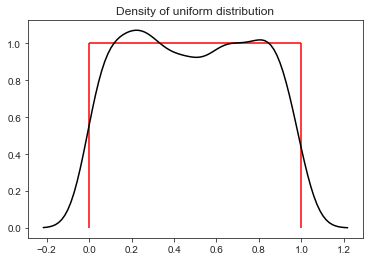

In [13]:
uniform_samples = np.random.uniform(0, 1, size = 1000)

# Plot the distribution of samples
sns.kdeplot(uniform_samples, color = 'black')

plt.vlines(0, 0, 1, colors = 'red')
plt.hlines(1, 0, 1, colors = 'red')
plt.vlines(1, 0, 1, colors = 'red')
plt.title('Density of uniform distribution')
plt.show()

Let's try simulating some uniform distributions. The code in the cell below creates and plots the histogram uniform distributions with $\{100, 1000, 10000, 100000\}$ realizations, along with the theoretical density. Execute this code and examine the results. Notice how close each histogram is to the theoretical density. 

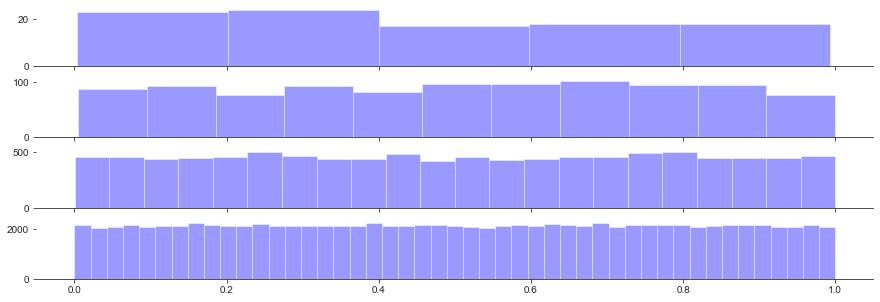

In [14]:
f, axes = plt.subplots(4, sharex = True, figsize = (15, 5))
sns.despine(left = True)

trials = [100, 1000, 10000, 100000]
nbins = 10 # how many bins to use for each histogram
for i in range(len(trials)):
    sns.distplot(np.random.uniform(0, 1, trials[i]), ax = axes[i], color = 'blue', kde = False)

One fun application of probabilites the unfiorm distribution is [Bouffon's needle problem](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem). Solving it requires only basic understanding of calculus and multivariate calculus. The results show a surprising way that $\pi$ can be approximated!

### Normal Distribution

The normal distribution is one of the most widely used probability distributions. Any case where values are the result of product of a large number of processes will converge to a normal distribution. Many physical processes produce measurement values which are well modeled by a normal distribution or log-normal distribution.

For a normal distribution we can write the density function as:

$$P(X) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\frac{-(X - \mu)^2}{2 \sigma^2}}$$

The parameters are $\mu$ and $\sigma$ and happen to also be the mean and standard deviations of the theoretical distribution respectively. In other words, the distribution is defined by its center (mean) and scale (standard deviation). The normal distribution has other important properties. For example, around 68% of the data is within 1 standard deviation from the mean, and around 95% is within 2 standard deviations from the mean as can be seen below:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png" alt="Normal distribution">

Source: [Wikipedia](https://en.wikipedia.org/wiki/Probability_density_function)

The code in the cell below computes and plots the normal distribution for four different combinations of location and scale, as shown in the table:

| $\mu$ | $\sigma$ |
|:-----:|:-------:|
| 0     | 1       |
| 5     | 1       |
| 0     | 0.1     |
| 4     | 4       |

By the way, the normal distribution with $\mu = 0$ and $\sigma = 1$ is a little special and we call it the **standard normal distribution**. In fact, any normally-distributed can be generated by first drawing a sample from the standard normal distribution and adding $\mu$ to it and multiplying it by $\sigma$.

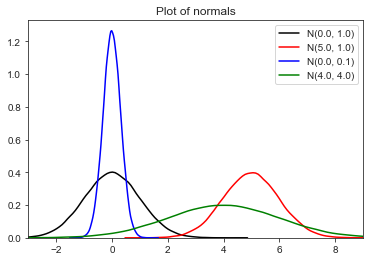

In [15]:
n = 100000

norm_params = [ # (mean, var)
    (0, 1),
    (5, 1),
    (0, .1),
    (4, 4)
]

norm_samples = [np.random.normal(mean, np.sqrt(var), n)
                for mean, var in norm_params]

plt.title('Plot of normals')
colors = ('black', 'red', 'blue', 'green')
for i, samples in enumerate(norm_samples):
    sns.kdeplot(samples, color = colors[i], label = 'N(%.1f, %.1f)' % norm_params[i])

plt.xlim(-3, 9);

We have now explored the basic properties of the normal distribution. The relationship between the the quantiles and the number of $\sigma$s to the left or right of center is another important property of the normal distribution. An understanding of this relationship provides some intuition about the likelihood of events under the normal distribution.

The code in the cell below plots a histogram of 100000 realizations of a standard normal distribution ($\mu = 0.0,\ \sigma = 1$). Vertical lines are plotted at $\sigma = \{-3, -2, -1,\ 0,\ 1,\ 2,\ 3\}$. Execute this code and examine the results. Notice that events become quite unlikely as $\sigma$ becomes large.

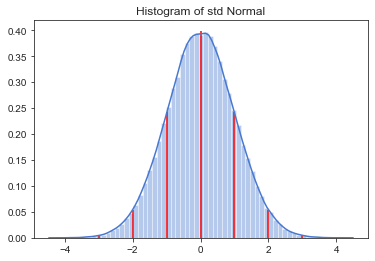

In [16]:
n = 100000

std_norm_samples = np.random.standard_normal(n)

plt.title('Histogram of std Normal')
sns.distplot(std_norm_samples, bins = 61)
# Draw lines at each standard deviation from the mean
plt.vlines(range(-3, 4), 0, scipy.stats.norm.pdf(range(-3, 4)), color = 'red');

In [17]:
std_thresholds = range(-3, 4)
quantiles = scipy.stats.norm.cdf(std_thresholds, scale = 1, loc = 0)
pd.DataFrame({
    'std deviations': std_thresholds,
    'quantile': quantiles,
})

,std deviations,quantile
0,-3,0.001350
1,-2,0.022750
2,-1,0.158655
3,0,0.500000
4,1,0.841345
5,2,0.977250
6,3,0.998650


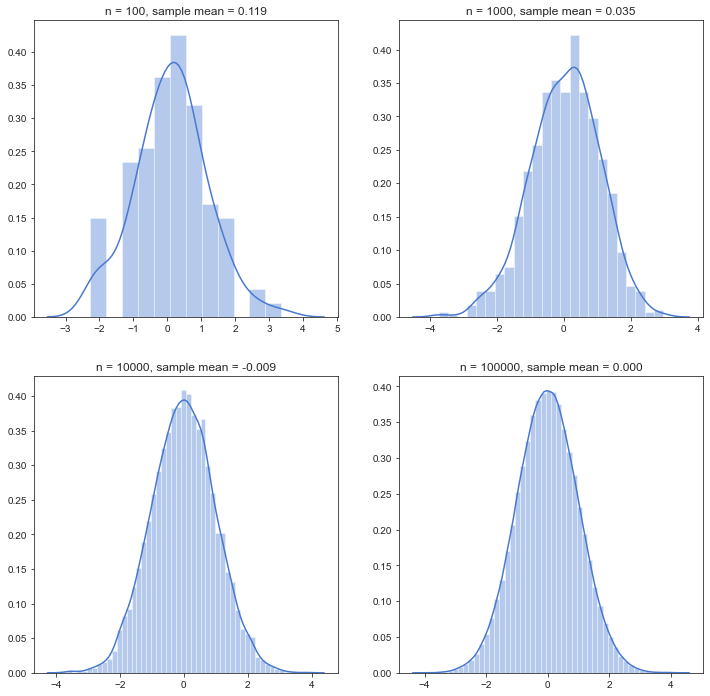

In [18]:
plt.figure(figsize = (12, 12))

for i, n in enumerate([100, 1000, 10000, 100000]):
    std_norm_samples = np.random.standard_normal(n)
    title = 'n = %d, sample mean = %.3f' % (n, std_norm_samples.mean())
    plt.subplot(2, 2, i+1, title = title)
    sns.distplot(std_norm_samples)

### Exercise

By convention, we call the function $F(x) = P(X \le x)$ the CDF (cumulative density function) of the random variable $X$, and the function $f(x) = P(X = x)$ the PDF (probability density function) of it. As we already mentioned, $P(X = x) = 0$ for any specific X = x, so the PDF of a random variable doesn't really have a good interpretation. Just think of it as the function (PDF), whose integral corresponds to another function (CDF) that for any value of $x$ gives you $P(X <= x)$. The CDF can be interpreted directly as a probability. In the `scipy` package we can access both of these functions for different distributions, for example `scipy.stats.norm.pdf` and `scipy.stats.norm.cdf` are the PDF and CDF of the normal distribution.

Let's say we have a normally distributed random variable $X$, defined (as we will see shortly) by its mean $\mu$ and standard deviation $\sigma$. The notation we use sometimes is $X \sim N(\mu, \sigma)$. Assuming $\mu = 4$ and $\sigma = 7$ let's first generate 10000 random points from this distribution and plot it.

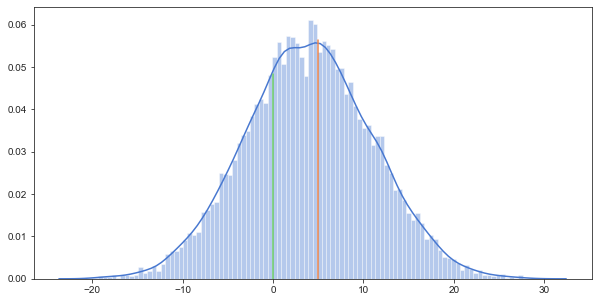

In [22]:
plt.figure(figsize = (10, 5))
mu, sigma = 4, 7
sns.distplot(np.random.normal(loc = mu, scale = sigma, size = 10000), bins = 100);
plt.plot([5, 5], [0, scipy.stats.norm.pdf(5, loc = mu, scale = sigma)]);
plt.plot([0, 0], [0, scipy.stats.norm.pdf(0, loc = mu, scale = sigma)]);

Find the following probabilities (HINT: use `scipy.stats.norm.cdf`):

- $P(X < 5)$ (area to the left of the orange line)
- $P(X > 5)$ (area to the right of the orange line)
- $P(0 < X < 5)$ (area between the green and orange line)

In [30]:
print(scipy.stats.norm.cdf(5, mu, sigma))
print(1 - scipy.stats.norm.cdf(5, mu, sigma))
print(scipy.stats.norm(mu, sigma).cdf(5) - scipy.stats.norm(mu, sigma).cdf(0))


0.5567984968164682
0.4432015031835318
0.2729439137177919


Let's see if we can show the relationship between a CDF and a PDF. Since at any point $x$ on the $x$ axis above, the PDF shows the hight of the above density plot and the CDF shows the area under it, show that we can estimate the CDF by numerically integrating the PDF. This is similar to approximating the area under the curve using the histogram in the above density plot. In calculus, this is called a **Riemann sum**.

In [28]:
delta_x = 0.001
lower_limit, upper_limit = 0, 5
interval_range = np.arange(lower_limit, upper_limit, delta_x)
sum([scipy.stats.norm.pdf(i, loc = mu, scale = sigma) * delta_x for i in interval_range])

0.2729399101351119

- Verify that the number we obtain above is an approximation for $P(0 < X < 5)$.

In [ ]:
# yep, I manually checked them. very close...

- We can also ask the question the other way around. For example, earlier we asked what is $P(X < 3)$. Now we want to know at what value of $X$ do we have $P(X < 3) = 0.4$. HINT: This can be answered using `scipy.stats.norm.ppf`, which is the inverse function to `scipy.stats.norm.pdf`.

In [32]:
# aka - where on the X axis do we need to be to have 40% of the area?
scipy.stats.norm.ppf(.4, loc = mu, scale = sigma)

2.226570278049402

- We mentioned earlier that when data is normally distributed 68% of the data is within 1 standard deviation and 95% is within two standard deviations from the mean. Verify these claims computationally on 1000 data points generated from the standard normal distribution ($\mu = 0$ and $\sigma = 1$).

### End of exercise

Similarly to the binomial distribution, it can be shown that as $\lambda$ increases the Poisson distribution approaches a continuous normal distribution. Notice how the poisson distributions below look more and more bell-curved as $\lambda$ increases.

In [ ]:
plt.figure(figsize = (15, 5))

lambdas = [1, 5, 25, 100]
poisson_samples = np.array([np.random.poisson(l, 1000) for l in lambdas]).transpose()
poisson_samples = pd.DataFrame(poisson_samples, columns = [str(l) for l in lambdas])
for l in lambdas:
    sns.distplot(poisson_samples[str(l)], bins = 25, kde = False);

The following plot shows how a poisson and normal distribution. 

In [ ]:
plt.figure(figsize = (10, 10))

lamb = 50
mu = lamb
sigma = lamb**0.5

num_samples = 100000
norm_samples = np.random.normal(loc = mu, scale = sigma, size = num_samples)
poisson_samples = np.random.poisson(lam = lamb, size = num_samples)
sns.distplot(poisson_samples, kde = False, color = "red")
sns.distplot(norm_samples, kde = False, color = "blue")
plt.legend(labels = ['Poisson', 'normal']);

To approximate the Poisson distribution with a normal distribution we need to apply the **continuity correction**:

$$P(50 <= X <= 60 | X\sim\text{Poisson}(\lambda)) \approx P(49.5 < X < 60.5 | X\sim\text{Normal}(\lambda, \lambda))$$

In [ ]:
lamb = 55
mu = lamb
sigma = lamb**0.5

normal_apprx = scipy.stats.norm.cdf(60.5, loc = mu, scale = sigma) - scipy.stats.norm.cdf(49.5, loc = mu, scale = sigma)
poisson_prob = scipy.stats.poisson.cdf(60, mu = lamb) - scipy.stats.poisson.cdf(50, mu = lamb)
print("Normal approximation = {}, exact value = {}".format(normal_apprx, poisson_prob))

### End of exercise

### Log-Normal Distribution

The normal distribution is defined for continuous random variables in the range $-\infty \le x \le \infty$. However, many quantities one can measure are only defined in a range $0 \lt x \le \infty$. Examples include, price, weight, length, and volume. 



In [ ]:
x = np.linspace(.01, 10, num = 10000)
log_normal_pdf = scipy.stats.lognorm.pdf(x, 1)
sns.lineplot(x, log_normal_pdf)
plt.title('Density of std log-normal')

The log-normal distribution is on log scale. You can transform the log-normal distribution to a normal distribution. In the cell below create and execute the code to **natural log transform the x variable** and plot the density.

In [ ]:
x = np.linspace(.01, 10, num = 10000)
x_log = np.log(x)
log_normal_pdf = scipy.stats.lognorm.pdf(x, 1)
sns.lineplot(x_log, log_normal_pdf)
plt.title('Density of std normal')

**Note:** For exploration and evaluation if the distribution is log-normal, it is more appropriate to transform the graph to log scale on x-axis than manipulating the data:

In [ ]:
x = np.linspace(.01, 10, num = 10000)
log_normal_pdf = scipy.stats.lognorm.pdf(x, 1)
sns.lineplot(x, log_normal_pdf)
plt.title('Density of std log-normal')
plt.xscale('log')

### Student t-distribution

The student t-distribution is often just referred to as the t-distribution. This distribution is of importance in statistics since the error in the difference of the means of normally distributed variables are t-distributed. 

The t-distribution is defined in a somewhat different way from the other distributions we have looked at. It has one parameter, the degrees of freedom, denoted as $\nu$. The derivation of the density function for the t-distribution is a bit complicated and leads to the following, rather complex result:

$$
P(X | \nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\sqrt{\nu \pi} \Gamma(\frac{\nu}{2})} \bigg(1 + \frac{X^2}{\nu} \bigg)^{- \frac{\nu + 1}{2}}\\
$$

where $\Gamma(X)$ is called the Gamma function.

Despite the complex density formula, you can gain a fair feel for the behavior of the t-distribution by plotting it for several values of $\nu$ and comparing it to the normal distribution. The code in the cell below plots the density function for the t-distribution for degrees of freedom, $\nu = \{1, 2, 3, \infty \}$, along with a standard normal distribution. Execute this code and examine the results. Notice how the t-distribution is wider with heavier tails than the normal distribution. As $\nu \rightarrow \infty$ the t-distribution becomes identical to the normal distribution. 

In [ ]:
plt.figure(figsize = (10, 10))
x = np.linspace(-4, 4, num = 100)

sns.lineplot(x, scipy.stats.norm.pdf(x), color = 'black', linewidth = 4, label = 'N(0,1)')

for df, color in zip([1, 2, 5, 1000], ['red', 'blue', 'green', 'orange']):  
    sns.lineplot(x, scipy.stats.t.pdf(x, df), label = 't(%d)' % df, color = color);

## Exponential distribution

The gamma distributions are a complex family of continuous probability distributions. All distributions in the gamma family are only defined for $0 <= X <= \infty$.

We will look at one special cases of particular interest, the exponential distribution. The exponential distribution is used to model waiting times between events. We can write the formula for the probability density function of the exponential distribution as:

$$P(x | \lambda) = \bigg\{ 
\begin{matrix}
\lambda \exp^{- \lambda X} &\text{ if } X \ge 0\\
0 &\text{ if } X \lt 0
\end{matrix}
$$

with an expected value of $\lambda^{-1}$ and variance of $\lambda^{-2}$. Note that $\lambda$ is called the average time between events.

To get a feel for the exponential distribution, let's plot it for arrival rates of $\{0.5, 1.0, 2.0  \}$ or $\lambda = \{ 2.0, 1.0, 0.5 \}$.

In [ ]:
x = np.linspace(0, 5, num = 100)
lambdas = [.5, 1., 2.]
colors = ['red', 'blue', 'green']

for i in range(len(lambdas)):
    sns.lineplot(x, scipy.stats.expon.pdf(x, loc = 0, scale = 1/lambdas[i]),
             color = colors[i], label = "lambda = {}".format(lambdas[i]))

## Simulations

<img src="https://upload.wikimedia.org/wikipedia/commons/8/84/Pi_30K.gif" alt="Monte Carlo">

Source: [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method)

In [ ]:
sizes = [10**i for i in range(2, 8)]
for n in sizes:
    X = np.random.uniform(size = n)
    Y = np.random.uniform(size = n)
    pi_approx = np.mean(X**2 + Y**2 < 1) * 4
    print("We approximate pi to {} using n = {}".format(pi_approx, n))

Simulation enables data scientists to study the stochastic behavior of processes with complex probability distributions. Simple processes might be approximated by a known, or 'named' distribution. In these simple cases, it might even be possible to derive analytical results. However, many real-world processes have complex behavior, resulting in complex distributions of output values. In these cases, simulation is a practical approach to understanding these processes. 

As cheap computational power has become ubiquitous, simulation has become a widely used technique in the data scientist's tool box. Simulations compute a large number of cases, or realizations, of the process being studied. The final or posterior distribution of the process being simulated is comprised of these realizations. The computing cost of each realization must be low in any practical simulation. 

Data scientists use simulation for a number of purposes:

- Simulation is used to test models. If data simulated from the model do not resemble the original data, something is likely wrong with the model.
- Simulation is used to understand processes with complex distributions. In these cases, simulation provides a powerful and flexible computational technique to understand this behavior.  

In this notebook you will create a simulation of a process with a complex distribution. 

Creating, testing and debugging simulation software can be tricky. Some of the techniques which can make your life easier are the same as you should use when developing any analytics software, or even software in general. These techniques include:

- Build your simulation as a series of small, easily tested chunks. In practice, this means you will build your simulation by creating and testing a set of small functions that comprise the overall model.
- Test each small functional unit individually. These tests should include at least testing some typical cases, as well as boundary or extreme cases. Sensible behavior with extreme or limiting cases is a requirement for a stable simulation. Both tabular and graphical output can be useful for evaluating tests.
- Test your overall simulation each time you add a new functional component. This processes ensures that all the pieces work together. 
- Simulations are inherently stochastic. If you want to create identical numerical results, say for automated testing, set a seed before you begin tests. In this notebook no seed is set so you can experience the stochastic nature of the simulation. 

### Sandwich shop simulation

As our example, we're going implements a simulation of the profitability of a sandwich shop. Not suprisingly, the sandwich shop earns money every time a customer buys a sandwich. However, the inputs to the sandwich cost money. The daily profit is the amount customers pay for the sandwiches minus the costs of the inputs. 

The cost of bread is a particular input which is difficult to manage. The shop bakes its own bread, and the bread must be used on the day it is made. The customers can select one of three types of bread, white, wheat, and multigrain. The customers are unusually picky. If the shop does not have sufficient bread of the customer's choice on hand, the customer will leave the shop without buying a sandwich. However, any extra bread left at the end of the day is discarded and the cost reduces the profitability of the shop. 

To keep the simulation simple, several assumptions are made:

- The probability that each customer chooses a particular type of bread is fixed and known. There probabilities are 50% for white bread, 25% for wheat and 25% for multigrain. 
- If a customer's choice of bread is not available the customer leaves the shop without buying a sandwich.
- The only perishable input which must be discarded at the end of each day is the bread. 
- Customers do not stop coming to the sandwich shop as a result of not finding their bread choice. 

The ability to compute large numbers of realizations from probability distributions is fundamental to simulation. Two questions naturally arise. 

- Which distribution to choose? The answer to this question is typically determined through a combination of domain knowledge and significant data exploration. Usually, several choices are tested and  compared.
- How many realizations are required? The answer will depend on the accuracy you require from your simulation and how patient you are. Typically, some tests will indicate an appropriate number of realizations.

In order to develop an overall profitability model the demand must be simulated. To simulate demand you must first simulate the number of arrivals and then the demand for each type of bread given the arrivals. 

#### Setting up and running the simulation

The demand for bread on a given day is simulated with the code in the cell below, using a **multi-nomial distribution**, an extension of the binomial distribution that allows more than just two (binary) outcomes (3 in this case) each having a probability $p_i$ of occuring.

In [ ]:
bread_types = ['white', 'wheat', 'multigrain']

def sim_bread(num_customers):
    bread_probas = [
      .50,  # white
      .25,  # wheat
      .25,  # multigrain
    ]
  
    return np.random.multinomial(n = num_customers, pvals = bread_probas)
  
sim_bread(num_customers = 100)

Examine the table of demand by type of bread. Notice that the proportions of white, wheat and muligrain are approximately 2, 1, 1, respectively. You can now compute the bread demand for one realization of arrivals.  

Next, you must simulate realizations of arrivals of people at the sandwich shop. Often arrival rates, k, per time interval are modeled as a Poisson process with rate or intensity $\lambda$, which can be written:

$$P(k \text{ arrivals } | \lambda \text{ average arrival rate}) = \frac{\lambda^k\ e^{-\lambda}}{k!}$$

If the arrival rate is fairly high, the difference between a Poisson distribution and an appropriate normal distribution will be minimal. So we could also use a normal distribution and apply the continuity correction.

The demand for bread is clearly dependent on the number of arrivals, as well as the probability that customers choose each type of bread. 

The code in the cell below performs the following operations:

- Compute the distribution of the arrivals by realizations of a Poisson distribution.
- Create a matrix to hold  the demand for each bread type for each realization of the arrivals.
- Loop over the realizations of the arrivals, compute the demand for each bread type, and save the results in a row of the matrix.

In [ ]:
def sim_demand(arrival_rate, num_days):
    arrivals = np.random.poisson(lam = arrival_rate, size = num_days) # compute realizations of arrivals
    demand = pd.DataFrame(columns = bread_types)

    for i, a in enumerate(arrivals):
        demand.loc[i, :] = sim_bread(num_customers = a)
    
    return demand

sim_demand(arrival_rate = 100, num_days = 10).head()

The number of each type of bread baked in the sandwich shop is deterministic. Presumably the shop manager has a plan for the day, and the bread is baked in advance of the customer arrivals. The code in the cell below computes the number of loaves of each type of bead baked. Run this code to test the function.

In [ ]:
def sim_supply(n_breads, num_days):
    supply = pd.DataFrame(columns = bread_types)
    for i in range(num_days):
        supply.loc[i, :] = [n_breads // i for i in [2, 4, 4]]

    return supply

sim_supply(n_breads = 100, num_days = 10).head()

You now have almost all the pieces in place to create the complete simulation of the distribution of profitability of the sandwich shop. The only missing piece is to compute the total profit based on the number of sandwiches sold and the cost of the bread baked.

The calculation of the profit is done by bread type. If the demand for a bread type is less that the available bread, the cost of the bread is subtracted by the profit at that demand. If the demand is greater than the available bread, the profit is limited by the amount of bread available. The code in cell below we compute profit based on supply and demand for bread.

In [ ]:
num_supply = 100 # how many breads you start with each day
num_days = 10 # how many days you want to simulation
arrival_rate = 100
sell_price = 4.0
cost_price = 1.25

In [ ]:
def sim_profit(num_supply, num_days, arrival_rate, sell_price, cost_price):

    supply = sim_supply(n_breads = num_supply, num_days = num_days)
    demand = sim_demand(arrival_rate = arrival_rate, num_days = num_days)
    
    left_over = (supply - demand)
    profit_if_left_over = sell_price * demand - cost_price * supply
    profit_if_sold_out  = sell_price * supply - cost_price * supply
    profit = (left_over >  0) * profit_if_left_over + (left_over <= 0) * profit_if_sold_out
        
    supply_demand = pd.concat([supply, demand, profit], axis = 1)
    supply_demand.columns = ['_'.join([i, j]) for i, j in list(itertools.product(['supply', 'demand', 'profit'], bread_types))]
    supply_demand['total_profit'] = supply_demand.filter(like = 'profit').apply(sum, axis = 1)
    
    return supply_demand


sim_profit(num_supply = 100, num_days = 10, arrival_rate = 100, sell_price = 4.00, cost_price = 1.25)

For a large number of iterations, it is easier to study the resulting distribution using summary statistics and plots. Let's increase `num_days` so we can generate lots of data.

In [ ]:
profits = sim_profit(num_supply = 100, 
                     num_days = 10000, # change n to larger number
                     arrival_rate = 100, 
                     sell_price = 4.00, 
                     cost_price = 1.25)

Let's compute the total demand across all bread types for each day, as well.

In [ ]:
profits['total_demand'] = profits.filter(like = 'demand').apply(sum, axis = 1)

We can now plot the distribution of demand over the days of our simulation, and the distribution of daily profits during the course of the simulation.

In [ ]:
f, axes = plt.subplots(2, figsize = (15, 10))
sns.despine(left = True)

def plot_scenario(profits):
    sns.distplot(profits['total_demand'], bins = 30, ax = axes[0])
    sns.distplot(profits['total_profit'], bins = 30, ax = axes[1]);
    
plot_scenario(profits)

#### Profit vs bread baked

Of several remaining questions, a manager of the sandwich shop might be most interested in the relationship between profitability and the number of loaves of bread baked. Understanding this relationship will help the manager optimize the profit of the shop. 

Since there is only one variable in this case, it is a simple matter to step over some likely values and find the one which optimizes the profit of the shop. The code in the cell does just this and graphs the result.

In [ ]:
bread_counts = (60, 80, 100, 120, 140, 160)
mean_profits = [sim_profit(n_bread, 1000, 100, 4.00, 1.25)['total_profit'].mean() for n_bread in bread_counts]

scenarios = pd.DataFrame({'bread_count': bread_counts, 'total_profit': mean_profits})
scenarios

In [ ]:
sns.lineplot(x = 'bread_count', y = 'total_profit', data = scenarios)
plt.title('Sandwich shop profit vs. bread baked');

There is still the issue of how much the results of this simulation vary from run to run. With a bit more code, the results of a number of simulation runs, the mean value, and the standard deviation of the profit across simulation runs can be computed and displayed. 

Run this code and examine the printed and plotted results. 

In [ ]:
def sim_profit_replicas(n_replicas, bread_counts, **kwargs):
    all_scenarios = []
    for replica_i in range(n_replicas):
        mean_profits = [sim_profit(num_supply = n_bread, **kwargs)['total_profit'].mean() for n_bread in bread_counts]
        scenarios = pd.DataFrame({'bread_count': bread_counts, 'total_profit': mean_profits})
        scenarios['replica_i'] = replica_i
        all_scenarios.append(scenarios)
        
    return pd.concat(all_scenarios)


replicas = sim_profit_replicas(
    n_replicas = 100, 
    bread_counts = (60, 80, 100, 120, 140, 160), 
    num_days = 100, 
    arrival_rate = 100, 
    sell_price = 4.00, 
    cost_price = 1.25)

In [ ]:
replicas.head(10)

We can easily compute the mean and standard deviation of the mean daily profit across our simulation replicas:

In [ ]:
replicas.groupby('bread_count')['total_profit'].agg(['mean', 'std'])

And now we can plot each of the simulation replicas to get a sense of the profit variance for each amount of bread we might bake daily.

In [ ]:
plt.figure(figsize = (12, 10))
sns.lineplot(x = 'bread_count', y = 'total_profit', data = replicas, units = 'replica_i', estimator = None);

For most part the difference in profits between 100 and 120 loaves of bread prepared is minimal. This is particularly the case if you look at the standard deviation of these means. 

## Summary

So we began by learning about probabilities and their properties, incliding conditional probability. We then related the concept of probability for a random variable $X$ to that of a distribution of $X$, which are defined by the PDF (or CDF) of $X$. We then looked at examples of specific probability distributions which are there to model real-life discrete or continuous events. We then saw how we can draw random numbers from these distributions to generate samples and run calculations on them, which is especially handy when what we're trying to estimate cannot be *analytically* derived (or not easily at least). We ended with an example of using simulations to do such an estimation.